In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc("font", family="Malgun gothic")
df_last = pd.read_csv("C:/Users/진광/Desktop/inflearn/dataset/주택도시보증공사_전국 평균 분양가격(2019년 12월).csv", encoding="cp949")
df_first = pd.read_csv("C:/Users/진광/Desktop/inflearn/dataset/전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv", encoding="cp949")

#df_last.isna().sum() 결측치 구하기 * isnull도 이용가능

df_last["분양가격"] = pd.to_numeric(df_last["분양가격(㎡)"], errors='coerce')
df_last["평당분양가격"] = df_last["분양가격"] * 3.3

#df_last["분양가격"].describe() 값을 요약

df_last["전용면적"] = df_last["규모구분"].str.replace("전용면적", "")
df_last["전용면적"] = df_last["전용면적"].str.replace("초과", "~")
df_last["전용면적"] = df_last["전용면적"].str.replace("이하","")
df_last["전용면적"] = df_last["전용면적"].str.replace(" ","").str.strip()

df_last.drop(["규모구분", "분양가격(㎡)"], axis=1, inplace = True)
'''
df_last.groupby(["지역명"])["평당분양가격"].mean()
df_last.groupby(["전용면적"])["평당분양가격"].mean()
df_last.groupby(["지역명", "전용면적"])["평당분양가격"].mean().unstack().round()

df_last.groupby(["연도", "지역명"])["평당분양가격"].mean().unstack().T
pd.pivot_table(df_last, index = ["지역명"], values = ["평당분양가격"], aggfunc="mean")
groupby와 pivot_table의 큰 차이는 리스트 형태로 나오느냐 아니면 데이터프레임형태로 나오냐이다.

pd.pivot_table(df_last, index="전용면적", values="평당분양가격")
pd.pivot_table(df_last, index="전용면적", columns="지역명", values="평당분양가격").round()
p=df_last.pivot_table(index=["연도", "지역명"], values="평당분양가격")

시각화 하기

g=df_last.groupby(["지역명"])["평당분양가격"].mean().sort_values(ascending=False)
g.plot.bar(rot=0, figsize=(10,3))

df_last.groupby(["전용면적"])["평당분양가격"].mean().plot.bar()
df_last.groupby(["연도"])["평당분양가격"].mean().plot()

p = df_last.pivot_table(index="연도", columns=["지역명"], values="평당분양가격")
#p.plot.box(figsize=(15,3), rot=30)
p.plot.line(figsize=(15,3), rot=30)
'''
import seaborn as sns
%matplotlib inline
#plt.figure(figsize=(10,3))
#sns.barplot(data=df_last, x="지역명", y="평당분양가격")
#plt.figure(figsize=(10,5))
#sns.lineplot(data=df_last, x="연도", y="평당분양가격", hue="지역명")
#plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
#sns.relplot(data=df_last, x="연도", y="평당분양가격", hue="지역명", kind="line", col="지역명", col_wrap=4)
#sns.catplot(data=df_last, x="연도", y="평당분양가격", kind="bar", col="지역명", col_wrap=4)
#sns.boxplot(data=df_last, x="연도", y="평당분양가격")
#sns.violinplot(data=df_last, x="연도", y="평당분양가격")


### lmplot 과 Swarmplot

In [23]:
#sns.regplot(data=df_last, x="연도", y="평당분양가격")
#sns.lmplot(data=df_last, x="연도", y="평당분양가격", hue="전용면적", col="전용면적", col_wrap=3)
#plt.figure(figsize=(15,3))
#sns.swarmplot(data=df_last, x="연도", y="평당분양가격", hue="전용면적")

### 이상치보기

In [26]:
df_last["평당분양가격"].describe()
max_price = df_last["평당분양가격"].max()
df_last[df_last["평당분양가격"] == max_price]

,지역명,연도,월,분양가격,평당분양가격,전용면적
3743,서울,2019,6,12728.0,42002.4,85㎡~102㎡
3828,서울,2019,7,12728.0,42002.4,85㎡~102㎡
3913,서울,2019,8,12728.0,42002.4,85㎡~102㎡
3998,서울,2019,9,12728.0,42002.4,85㎡~102㎡
4083,서울,2019,10,12728.0,42002.4,85㎡~102㎡
4168,서울,2019,11,12728.0,42002.4,85㎡~102㎡
4253,서울,2019,12,12728.0,42002.4,85㎡~102㎡


### 수치데이터 히스토그램 그리기

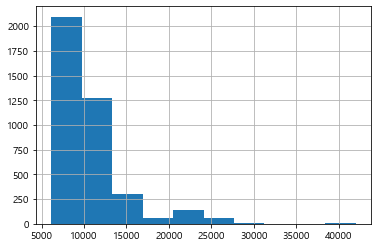

In [28]:
h = df_last["평당분양가격"].hist(bins=10)

In [29]:
price = df_last.loc[df_last["평당분양가격"].notnull(), "평당분양가격"]

<AxesSubplot:xlabel='평당분양가격', ylabel='Density'>

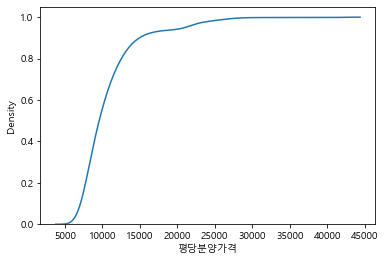

In [33]:
#sns.distplot(price, hist=False, rug=True)
#sns.kdeplot(price, cumulative=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-pack

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-pack

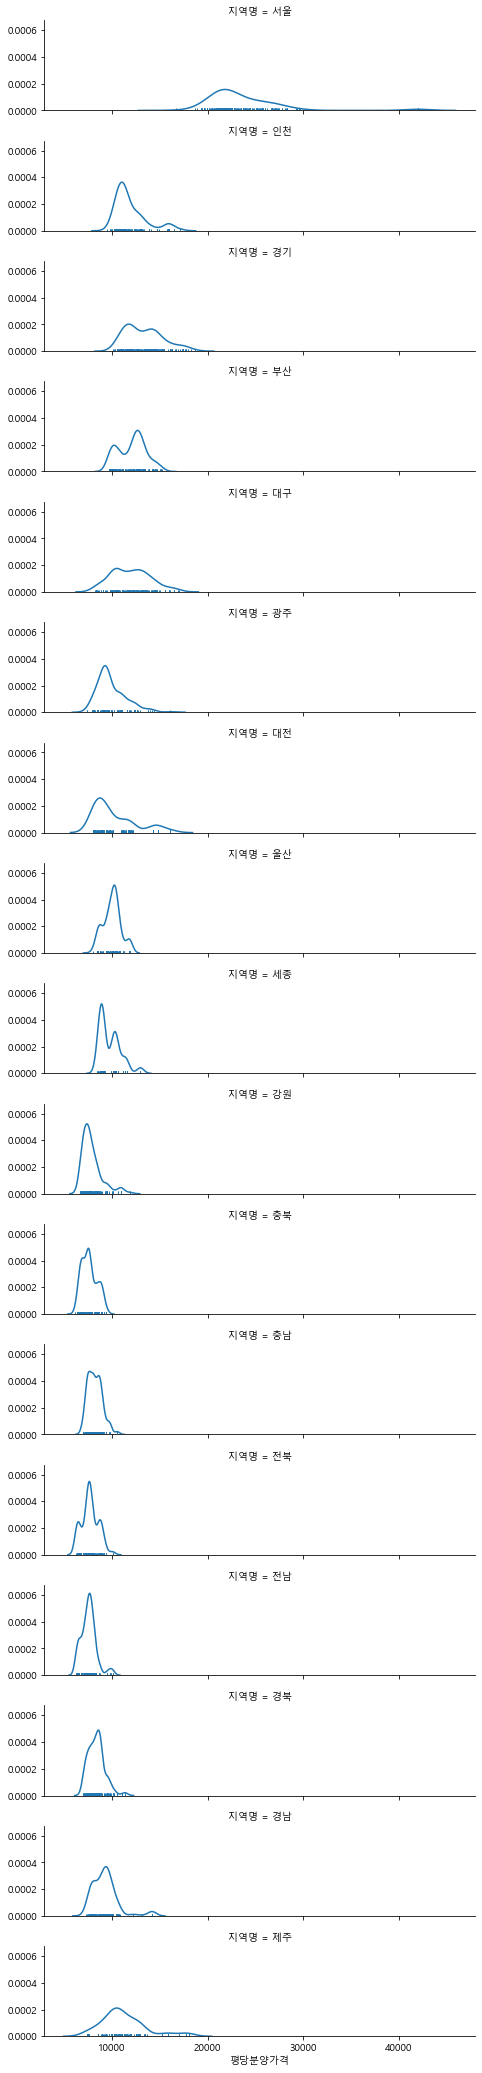

In [35]:
g = sns.FacetGrid(df_last, row="지역명",

                  height=1.7, aspect=4,)

g.map(sns.distplot, "평당분양가격", hist=False, rug=True)

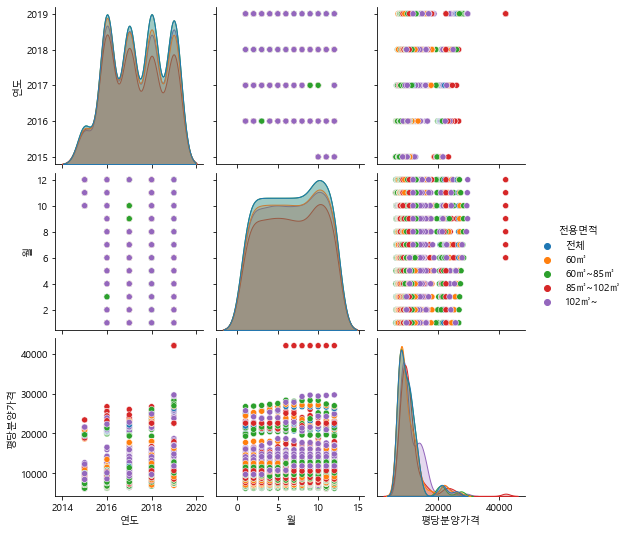

In [39]:
df_last_notnull = df_last.loc[df_last["평당분양가격"].notnull(), ["연도", "월", "평당분양가격", "지역명", "전용면적"]]
sns.pairplot(df_last_notnull, hue="전용면적")


In [41]:
df_last["전용면적"].value_counts()

85㎡~102㎡    867
전체          867
60㎡         867
60㎡~85㎡     867
102㎡~       867
Name: 전용면적, dtype: int64

In [48]:
pd.options.display.max_columns = 25
#df_first.head()
#df_first.info()
#df_first.isnull().sum()
df_first_melt = df_first.melt(id_vars="지역", var_name="기간", value_name="평당분양가격")
df_first_melt.columns = ["지역명", "기간", "평당분양가격"]
df_first_melt.head(1)

,지역명,기간,평당분양가격
0,서울,2013년12월,18189
